## Comparing Regressions
- comparing several ML algorithms for build regression models for corona inhibitors

### Import libraries

In [1]:
! pip install lazypredict

In [2]:


import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

### Load the dataset

In [3]:
df = pd.read_csv('bioactivity_data_3class_pIC50_morgan_fp.csv')

In [4]:

X = df.drop('pIC50', axis=1)
Y = df.pIC50

## Data Preprocessing

In [5]:
# Examine X dimension
X.shape

(427, 2050)

In [6]:

# Remove low variance features
X = df.drop(columns=['canonical_smiles', 'molecule_chembl_id', 'pIC50'])

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(427, 48)

In [7]:

# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Comparing ML Models

In [8]:
!conda install -y ipywidgets


Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [9]:

# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 341, number of used features: 48
[LightGBM] [Info] Start training from score 4.928869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 341, number of used features: 48
[LightGBM] [Info] Start training from score 4.928869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i


# Performance table of the training set (80% subset)
predictions_train
     

In [11]:

# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SVR,0.31,0.70,0.45,0.01
NuSVR,0.30,0.69,0.46,0.01
RandomForestRegressor,0.29,0.69,0.46,0.07
BaggingRegressor,0.26,0.68,0.47,0.01
HistGradientBoostingRegressor,0.25,0.67,0.47,0.54
XGBRegressor,0.23,0.67,0.48,0.09
GradientBoostingRegressor,0.23,0.67,0.48,0.03
KNeighborsRegressor,0.17,0.64,0.50,0.00
LGBMRegressor,0.17,0.64,0.50,0.15


## Data visualization of model performance

[(0.0, 1.0)]

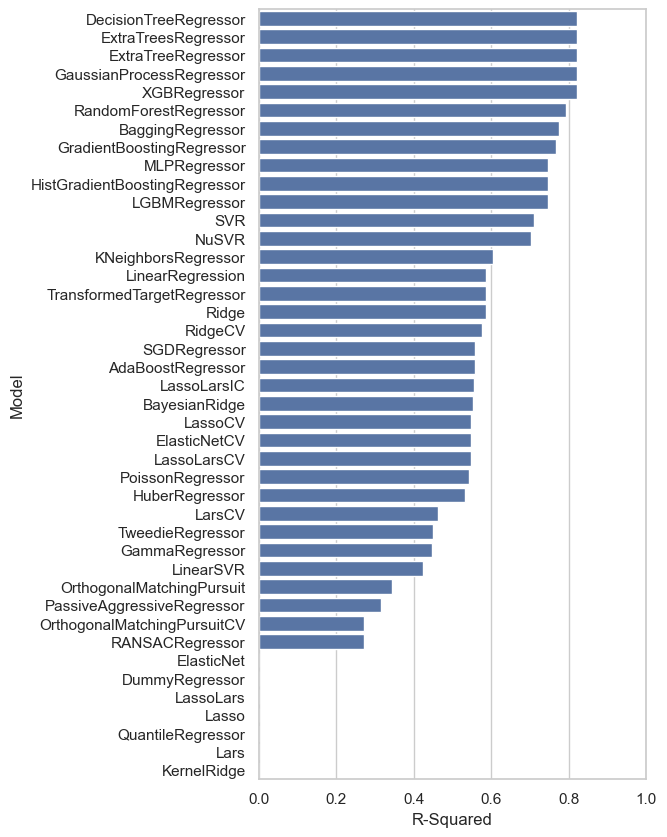

In [15]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
     

[(0.0, 10.0)]

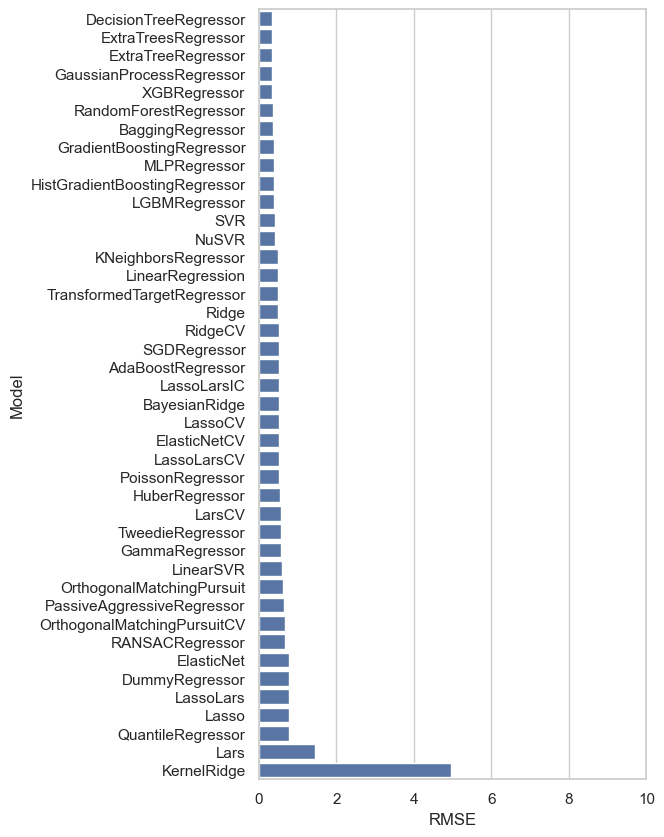

In [16]:

# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:

# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]